# Decision tree (level 1)

In [16]:
import pandas as pd
from _datetime import date
import pickle
from io import StringIO
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# from transformers import (AutoTokenizer,
#                           AutoModelForMaskedLM)
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import export_text

In [17]:
# df = pd.read_csv('../01trainingdataset/2021-01-11_datasetSecondLevel.csv')
# df = pd.read_csv('../01trainingdataset/2021-01-20_datasetSecondLevel.csv')
df = pd.read_csv('../../01trainingdataset/dataset/2021-06-06_datasetSecondLevel.csv')
df.head()

,source,condition,CEsnippet,Sentence,newTag
0,MAYO,Acute kidney failure,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...,FAST
1,MAYO,Systemic mastocytosis,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis...",FAST
2,MAYO,Plague,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...,FAST
3,MAYO,Dermatographia,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an...",FAST
4,NHS,Epiglottitis,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...,FAST


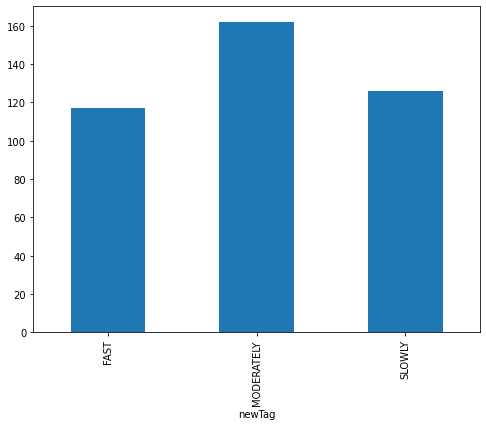

In [18]:
fig = plt.figure(figsize=(8,6))
df.groupby('newTag').Sentence.count().plot.bar(ylim=0)
plt.show()

In [19]:
X = df.Sentence
y = df.newTag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 12,stratify=y)

In [20]:
tr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True,norm='l2')),
               ('clf', tree.DecisionTreeClassifier(random_state=12)),
               #('clf', tree.DecisionTreeClassifier(random_state=12,class_weight='balanced')),
              ])
tr.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=12))])

In [22]:
%%time

y_pred = tr.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8934426229508197
              precision    recall  f1-score   support

        FAST       0.94      0.97      0.96        35
  MODERATELY       0.91      0.86      0.88        49
      SLOWLY       0.82      0.87      0.85        38

    accuracy                           0.89       122
   macro avg       0.89      0.90      0.90       122
weighted avg       0.89      0.89      0.89       122

CPU times: user 23.7 ms, sys: 0 ns, total: 23.7 ms
Wall time: 24.3 ms


In [23]:
newdf = pd.DataFrame({'testSentence': X_test.values})
newdf['testTag'] = y_test.values
newdf['predictedTag'] = y_pred

In [24]:
newdf.testTag.value_counts(dropna=False)

MODERATELY    49
SLOWLY        38
FAST          35
Name: testTag, dtype: int64

In [25]:
newdf.predictedTag.value_counts(dropna=False)

MODERATELY    46
SLOWLY        40
FAST          36
Name: predictedTag, dtype: int64

In [26]:
newdf.to_csv('03Level2/'+str(date.today())+'_DT_testingDataResult.csv')

In [27]:
newdf['flag'] = (newdf['testTag'] == newdf['predictedTag'])
flag = [False]
errors = newdf[newdf.flag.isin(flag)]
#errors.head(39)

# Saving the model

In [28]:
#Save the model
filename = 'models/'+str(date.today())+'_Level2_DecisionTree.pkl'
pickle.dump(tr, open(filename, 'wb'))
# Close the pickle instances
#pickle.close()

# Plotting results

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.legend()
plt.show()